Practice : Source localization problem

-> Given : N-locations a_1, a_2,...,a_N \in R^m of seonsors and approximate distaces d_i between the sensors and an unknown "source" located at x \in R^m:

-> Goal : find and estimate x \in R^m given the locations a_1,a_2,...,a_N and d_1,d_2,...,d_N

-> optimization problem - a nonlinear least squares problem

\min_x f(x) \equi \sum_{i=1}^N(||x-a_i||_2^2 -d_i^2)^2

calculation of \nabla f(x) : 
    \frac{\part f}{\part x_j}(x) = 4 \sum_i=1^N (||x-a_i||_2^2-d_i^2)(x-a_i)

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
N=5
m=2
step_size=0.01
max_iter=5000

#initialize
a=np.zeros([N,m])
d=np.zeros([N,1])

#assign Given locations of sensors:
a[0]=(0.5376,1.8338)
a[1]=(-2.2588,0.8621)
a[2]=(0.3187,-1.3076)
a[3]=(-0.4335,0.3426)
a[4]=(3.5783,2.7694)

#assign Given approximate distances:
d[0]=0.7124
d[1]=3.0812
d[2]=2.6806
d[3]=1.7731
d[4]=4.6621

In [104]:
def cost(x,a,d,n):
    return np.sum(((np.sum((x-a)**2,axis=1)).reshape(n,1)-d**2)**2)

def derivative_cost(x,a,d,n):
    return 4*np.sum(((np.sum((x-a)**2,axis=1).reshape(n,1)-d**2)*(x-a)))

In [105]:
def GD_update(x_GD,a,d,N):
    for i in range(max_iter):
        x_GD -= 0.001 * derivative_cost(x_GD,a,d,N)
        if i%100==0:
            plt.scatter(i,cost(x_GD,a,d,N))
    return x_GD

array([-0.07810879,  0.47349121])

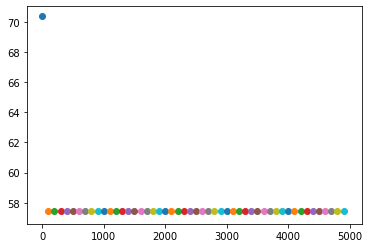

In [107]:
#Let x be a random initial value
x_GD=np.mean(a,axis=0)
GD_update(x_GD,a,d,N)

In [108]:
def MGD_update(x_MGD,a,d,N):
    Momentum =0.9
    gamma=1
    for i in range(max_iter):
        gamma  = Momentum*gamma + 0.001*derivative_cost(x_MGD,a,d,N)
        x_MGD -= gamma
   
        if i%100 ==0:
            plt.scatter(i,cost(x_MGD,a,d,N))
        
    return x_MGD

array([-0.07810879,  0.47349121])

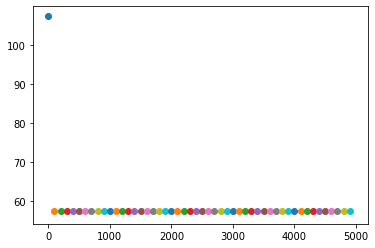

In [109]:
x_MGD=np.mean(a,axis=0)
MGD_update(x_MGD,a,d,N)

In [112]:
def derivative_cost_SGD(x,a,d,n):
    return 4*np.sum(((np.sum((x-a)**2).reshape(n,1)-d**2)*(x-a)))

def SGD_update(x_SGD,a,d,N):
    from itertools import permutations
    n=2
    perm = permutations(range(N),n)
    p=list(perm)

    for i in range(max_iter):
        O=int(np.random.rand(1,1)*101)% len(p)
        ind_1=p[O][0]
        ind_2=p[O][1]
    
        x_SGD -= 0.001*derivative_cost_SGD(x_SGD,a[ind_1],d[ind_1],1)
        x_SGD -= 0.001*derivative_cost_SGD(x_SGD,a[ind_2],d[ind_2],1)
       
        if i%100 ==0:
            plt.scatter(i,cost(x_SGD,a,d,N))
    return x_SGD

array([-0.04931717,  0.50228283])

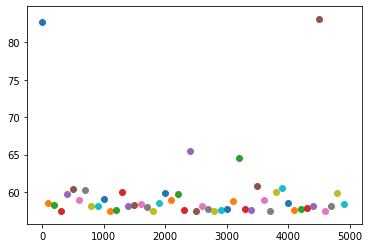

In [114]:
x_SGD=np.mean(a,axis=0)
SGD_update(x_SGD,a,d,N)

 GD result :  [-0.07810879  0.47349121]
MGD result :  [-0.07810879  0.47349121]
SGD result :  [-0.04931717  0.50228283]


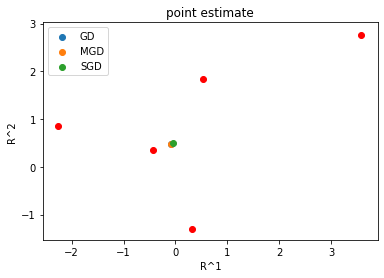

In [117]:
for i in range(N):
    plt.scatter(a[i][0],a[i][1],color='r')

plt.scatter(x_GD[0],x_GD[1],label='GD')
plt.scatter(x_MGD[0],x_MGD[1],label='MGD')
plt.scatter(x_SGD[0],x_SGD[1],label='SGD')

plt.xlabel('R^1')
plt.ylabel('R^2')
plt.legend(loc='upper left')
plt.title('point estimate')

print(' GD result : ',x_GD)
print('MGD result : ',x_MGD)
print('SGD result : ',x_SGD)